<h2>Part I: Introduction and Preparation</h2><br>

The dataset represents the app download behavior of consumers as well as other information. The demographic and psychometric information for each consumer were captured by survey for analysis to help the marketing department segment users:<br><br><br>
<br><h4>a) Imports and Loading the Dataset</h4>
1. Import the following packages:

2. Load the <strong> Mobile_App_Survey_Data.xlsx </strong> dataset


In [1]:
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
import sys                                                  # system-specific parameters and functions

from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from sklearn.cluster            import KMeans               # KMeans
from scipy.cluster.hierarchy    import dendrogram, linkage  # dendrograms

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

# Importing the dataset
file = './Mobile_App_Survey_Data.xlsx'
survey = pd.read_excel(io = file,
                       sheet_name = 0,
                       header = 0)

# Displaying the first 5 rows of the dataset
survey.head(n = 5)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Initial Exploration of the Dataset</h3><br>


In [3]:
# Checking the missing values in the original dataset
print('Missing values:', survey.isnull().any().any())

Missing values: False



<h4>a)Number of features (columns) present in the dataset

In [4]:
# Checking the description of features
survey.describe().round(decimals = 1)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
count,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0,1552.0
mean,1192.9,4.5,0.5,0.2,0.4,0.2,0.1,0.1,0.0,0.2,0.0,0.0,0.7,0.2,0.5,0.3,0.8,0.8,0.5,0.5,0.3,0.1,0.0,3.1,4.2,1.4,2.7,3.3,2.4,3.2,1.6,3.4,3.3,2.8,2.7,3.1,2.5,3.2,1.7,2.2,3.2,2.9,1.8,2.1,2.0,3.8,2.1,2.4,2.0,2.4,2.5,2.2,2.3,2.4,4.3,2.1,2.7,2.2,2.2,2.4,2.8,3.0,2.2,3.0,3.0,3.0,3.2,3.3,2.6,2.8,3.9,3.1,3.3,3.3,2.4,3.1,2.5,3.6,1.9,0.5,0.2,0.2,0.1,0.2,1.7,1.8,7.8,1.5
std,712.0,2.4,0.5,0.4,0.5,0.4,0.2,0.3,0.2,0.4,0.2,0.0,0.5,0.4,0.5,0.4,0.4,0.4,0.5,0.5,0.5,0.3,0.1,1.0,1.3,0.9,1.2,1.0,1.2,1.1,0.8,1.0,1.0,1.2,1.2,1.1,1.3,1.5,1.0,1.4,1.6,1.4,1.0,1.1,1.0,1.6,1.1,1.3,1.0,1.1,1.2,1.1,1.1,1.2,1.5,1.1,1.2,1.1,1.1,1.2,1.3,1.5,1.2,1.4,1.3,1.4,1.5,1.5,1.4,1.4,1.8,1.4,1.5,1.4,1.2,1.4,1.3,1.2,0.9,0.5,0.4,0.4,0.4,0.4,1.5,0.4,3.7,0.5
min,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
25%,570.8,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0,1.0,3.0,1.0,2.0,1.0,3.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,1.0
50%,1144.5,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,4.0,1.0,3.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,1.0,2.0,3.0,3.0,1.0,2.0,2.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,7.5,2.0
75%,1833.5,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,4.0,5.0,1.0,4.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,3.0,4.0,4.0,2.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,6.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,6.0,4.0,4.0,4.0,3.0,4.0,3.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,11.0,2.0
max,2396.0,11.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,4.0,1.0,1.0,1.0,1.0,1.0,6.0,2.0,14.0,2.0


After examining the presented questions and sub-questions, we decided to separate them and combine them into demographic, psycho-behavioral and tech-based psychological data.

In [5]:
# Concatenating variables together using dictionary
survey_dict = {
    
# Demographic features
'demographic'  : ['q1',     # Age Groups
                  'q48',    # Level of Education
                  'q49',    # Marital Status
                  'q50r1',  # Children - No Children
                  'q50r2',  # Children - <6 yrs
                  'q50r3',  # Children - 6-12 yrs
                  'q50r4',  # Children - 13-17 yrs
                  'q50r5',  # Children - >18 yrs
                  'q54',    # Race
                  'q55',    # Hispanic / Latino
                  'q56',    # Income
                  'q57'],   # Gender
            
    
# General Psychology features, including Behavioral and Tech-based Questions
'behaviour_gen' : ['q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6',
                  'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11',       # people's focus of Apps' use

                  'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5',
                  'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10',
                  'q13r11', 'q13r12',                             # people's time spent in Apps 

                  'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 
                  'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10',
                  'q24r11', 'q24r12',                             # behaviour questions (more tech)

                  'q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5',
                  'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 
                  'q25r11', 'q25r12',                             # behaviour questions (more psychosocial metric)

                  'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7',
                  'q26r8', 'q26r9', 'q26r10', 'q26r11', 
                  'q26r12', 'q26r13', 'q26r14', 'q26r15', 
                  'q26r16', 'q26r17', 'q26r18'],                  # behaviour questions (more psychosocial metric)
    
    
# Tech-based questions    
'tech_based'   : ['q4r1', 'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6',
                  'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11',       # people's focus of Apps' use
                  
                  'q11',                                          # quantity of Apps installed on the smartphone
                  
                  'q12',                                          # percentage of free-downloaded apps
                  
                  'q13r1', 'q13r2', 'q13r3', 'q13r4', 'q13r5',
                  'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10',
                  'q13r11', 'q13r12',                             # time spent in Apps 

                  'q24r1', 'q24r2', 'q24r3', 'q24r4', 'q24r5', 
                  'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10',
                  'q24r11', 'q24r12'],                            # behaviour questions, directly related to tech
    
    
# Behaviour questions, not directly related to tech and Apps
'behav_based'  : ['q25r1', 'q25r2', 'q25r3', 'q25r4', 'q25r5',
                  'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10', 
                  'q25r11', 'q25r12',                             

                  'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7',
                  'q26r8', 'q26r9', 'q26r10', 'q26r11', 
                  'q26r12', 'q26r13', 'q26r14', 'q26r15', 
                  'q26r16', 'q26r17', 'q26r18']}                  
            

    
# Creating DataFrame with demographic features only
survey_dem = pd.DataFrame(survey.loc[:, survey_dict['demographic']])


# Creating DataFrame with general behavioral questions
survey_beh_gen = pd.DataFrame(survey.loc[:, survey_dict['behaviour_gen']])


# Creating Main DataFrame with tech-based questions
survey_tech = pd.DataFrame(survey.loc[:, survey_dict['tech_based']])


# Creating Other Main DataFrame with more behavioural questions
survey_beh = pd.DataFrame(survey.loc[:, survey_dict['behav_based']])

In [6]:
# Checking DataFrame with subquestions of question 13
q13 = pd.DataFrame(survey.loc[:, ['q13r1', 'q13r2', 'q13r3', 'q13r4', 
                                     'q13r5', 'q13r6', 'q13r7', 'q13r8', 
                                     'q13r9', 'q13r10', 'q13r11', 'q13r12']])


# Calculating the Variance and Mean across customers (rows) of q13
q13_var = np.var(q13.T)     # variance
q13_mean = np.mean(q13.T)   # mean 


# Average score of calculations above
q13_var_avg = np.mean(q13_var)   # variance
q13_mean_avg = np.mean(q13_mean) # mean


# Displaying the variance and mean of q13 subquestions
print('Average Mean across customers:      ', round(q13_mean_avg, 2),
      '\nAverage Variance across customers:  ', round(q13_var_avg, 2))

Average Mean across customers:       2.71 
Average Variance across customers:   1.17


In [7]:
# definition of scree_plot ---------------------------------------------------
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    """
    # Building a scree plot

    # Setting plot size
    fig, ax  = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # Developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth       =  2,
             marker          = 'o',
             markersize      =  10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # Setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)
        
    # Displaying the plot
    plt.show()


# definition of unsupervised_scaler ------------------------------------------

def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """
    # Building an auto scaler
    
    # Instantiating a StandardScaler()
    scaler = StandardScaler()


    # Transforming data after fit across rows / customers
    x_scaled_rows = scaler.fit_transform(df.T).T
    
    
    # Transforming data after fit across columns / questions
    x_scaled = scaler.fit_transform(x_scaled_rows)

    
    # Converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # Reattaching column names
    new_df.columns = df.columns
    
    return new_df

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Principal Component Analysis (PCA) of Tech-based data.</strong>


In [8]:
# Scaling variables

# Applying the unsupervised_scaler function
survey_tech_scaled = unsupervised_scaler(df = survey_tech) # tech-based questions

# Instantiating a PCA object with no limit to principal components for Tech-based Questions
pca = PCA(n_components = None,
            random_state = 219)


# Fit_transforming with scaled tech-based data 
survey_tech_pca = pca.fit_transform(survey_tech_scaled)

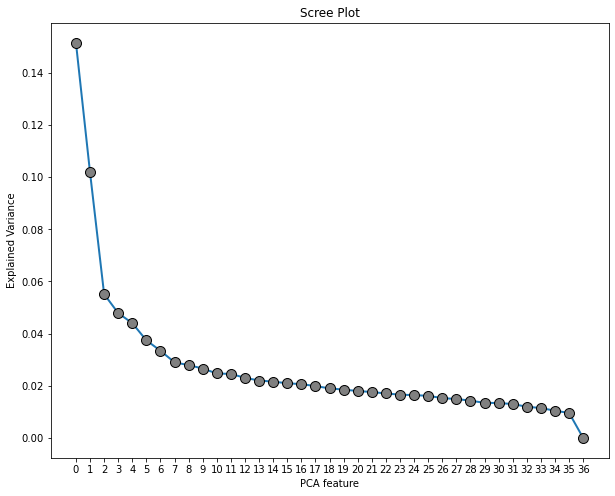

In [9]:
# Calling the scree_plot function for tech-based questions
scree_plot(pca_object = pca)

In [10]:
# Component number counter
component_number    = 0
cumulative_variance = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number    += 1
    cumulative_variance += variance
    print(f"""
PC:                  {component_number}
Percentage Variance: {variance.round(3)}
Cumulative Variance: {cumulative_variance.round(3)}""") 


PC:                  1
Percentage Variance: 0.152
Cumulative Variance: 0.152

PC:                  2
Percentage Variance: 0.102
Cumulative Variance: 0.253

PC:                  3
Percentage Variance: 0.055
Cumulative Variance: 0.308

PC:                  4
Percentage Variance: 0.048
Cumulative Variance: 0.356

PC:                  5
Percentage Variance: 0.044
Cumulative Variance: 0.4

PC:                  6
Percentage Variance: 0.037
Cumulative Variance: 0.438

PC:                  7
Percentage Variance: 0.033
Cumulative Variance: 0.471

PC:                  8
Percentage Variance: 0.029
Cumulative Variance: 0.5

PC:                  9
Percentage Variance: 0.028
Cumulative Variance: 0.528

PC:                  10
Percentage Variance: 0.027
Cumulative Variance: 0.555

PC:                  11
Percentage Variance: 0.025
Cumulative Variance: 0.58

PC:                  12
Percentage Variance: 0.025
Cumulative Variance: 0.604

PC:                  13
Percentage Variance: 0.023
Cumulative Var

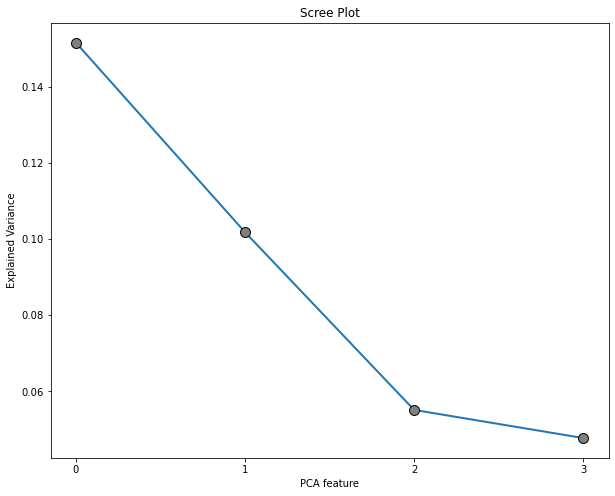

In [20]:
# Limitation with chosen number of components for analysis

# Instantiating a new model using the first four PC
pca_4 = PCA(n_components = 4,
            random_state = 219)


# Fit_transforming with survey_tech_scaled
tech_4 = pca_4.fit_transform(survey_tech_scaled)

# Calling the scree_plot function
scree_plot(pca_object = pca_4)

In [21]:
# Transposing PCA components - tech-based questions
factor_loadings_df_tech = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# Naming rows as original features
factor_loadings_df_tech = factor_loadings_df_tech.set_index(survey_tech_scaled.columns)


# Saving to Excel accordingly
factor_loadings_df_tech.to_excel('tech_factor_loadings.xlsx')

In [22]:
# Analyzing output of the PCA 
tech_1st_component = factor_loadings_df_tech.iloc[:, 0]\
                     [abs(factor_loadings_df_tech.iloc[:, 0]) >= 0.23]  # first component

tech_2nd_component = factor_loadings_df_tech.iloc[:, 1]\
                     [abs(factor_loadings_df_tech.iloc[:, 1]) >= 0.23]  # second component

tech_3rd_component = factor_loadings_df_tech.iloc[:, 2]\
                     [abs(factor_loadings_df_tech.iloc[:, 2]) >= 0.23]  # third component

tech_4th_component = factor_loadings_df_tech.iloc[:, 3]\
                     [abs(factor_loadings_df_tech.iloc[:, 3]) >= 0.23]  # forth component

# Displaying the result with significant correlation (>= 23%) between pc and questions
print(f"""
Tech-Based Questions
---------------------------
> 1st Component        
Explained Variance = 15.2%             
{tech_1st_component.to_string()}

> 2nd Component
Explained Variance = 10.2%
{tech_2nd_component.to_string()}

> 3rd Component
Explained Variance = 5.5%
{tech_3rd_component.to_string()}

> 4th Component
Explained Variance = 4.8%
{tech_4th_component.to_string()}
""")


Tech-Based Questions
---------------------------
> 1st Component        
Explained Variance = 15.2%             
q4r1     -0.23
q4r5     -0.23
q4r6     -0.28
q4r8     -0.23
q24r7     0.23
q24r10    0.24
q24r12    0.24

> 2nd Component
Explained Variance = 10.2%
q4r4     0.23
q13r3   -0.26
q13r5   -0.27
q13r7   -0.28
q13r8   -0.28

> 3rd Component
Explained Variance = 5.5%
q12      0.25
q24r1   -0.39
q24r4   -0.46
q24r9   -0.45

> 4th Component
Explained Variance = 4.8%
q4r6     -0.32
q13r1     0.55
q24r3     0.46
q24r11   -0.24
q24r12   -0.23



In [23]:
# Transposing PCA components (pc = 4)
tech_loadings = pd.DataFrame(np.transpose(pca_4.components_))


# Naming rows as original features
tech_loadings = tech_loadings.set_index(survey_tech_scaled.columns)

# Naming each principal component
tech_loadings.columns = ['No Fun',                  # not using phone for shopping, music and gaming (for entertainment)
                         'Old School',              # prefers ancient apps and tv shows
                         'Concerned Tech Follower', # follows technology with a lot of concern
                         'Ancient Messenger']       # old-approach of chating (email, skype smth like that)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Principal Component Analysis (PCA) of Behavioral data.</strong>


In [24]:
# Scaling variables

# Applying the unsupervised_scaler function
survey_beh_scaled = unsupervised_scaler(df = survey_beh)   # behavioral questions

# Instantiting a PCA object with no limit to principal components for behavioral questions
pca_1 = PCA(n_components = None,
            random_state = 219)


# Fit_transforming with scaled behavioral data 
survey_beh_pca = pca_1.fit_transform(survey_beh_scaled)

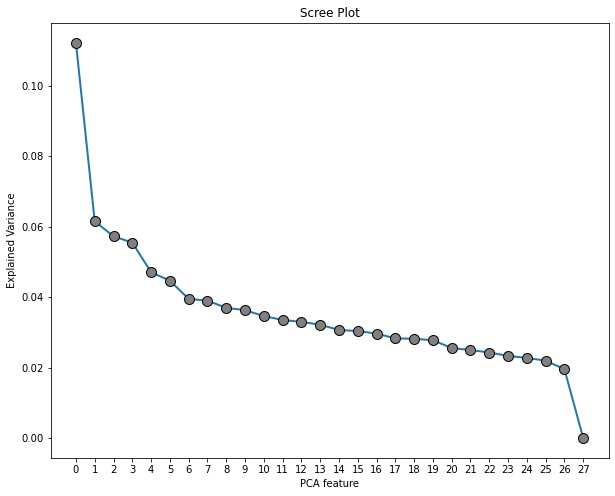

In [25]:
# Calling the scree_plot function with behavioral questions
scree_plot(pca_object = pca_1)

In [26]:
# Component number counter
component_number    = 0
cumulative_variance = 0


# looping over each principal component
for variance in pca_1.explained_variance_ratio_:
    component_number    += 1
    cumulative_variance += variance
    print(f"""
PC:                  {component_number}
Percentage Variance: {variance.round(3)}
Cumulative Variance: {cumulative_variance.round(3)}""") 


PC:                  1
Percentage Variance: 0.112
Cumulative Variance: 0.112

PC:                  2
Percentage Variance: 0.062
Cumulative Variance: 0.174

PC:                  3
Percentage Variance: 0.057
Cumulative Variance: 0.231

PC:                  4
Percentage Variance: 0.055
Cumulative Variance: 0.286

PC:                  5
Percentage Variance: 0.047
Cumulative Variance: 0.333

PC:                  6
Percentage Variance: 0.045
Cumulative Variance: 0.378

PC:                  7
Percentage Variance: 0.039
Cumulative Variance: 0.418

PC:                  8
Percentage Variance: 0.039
Cumulative Variance: 0.456

PC:                  9
Percentage Variance: 0.037
Cumulative Variance: 0.493

PC:                  10
Percentage Variance: 0.036
Cumulative Variance: 0.53

PC:                  11
Percentage Variance: 0.035
Cumulative Variance: 0.564

PC:                  12
Percentage Variance: 0.034
Cumulative Variance: 0.598

PC:                  13
Percentage Variance: 0.033
Cumulative

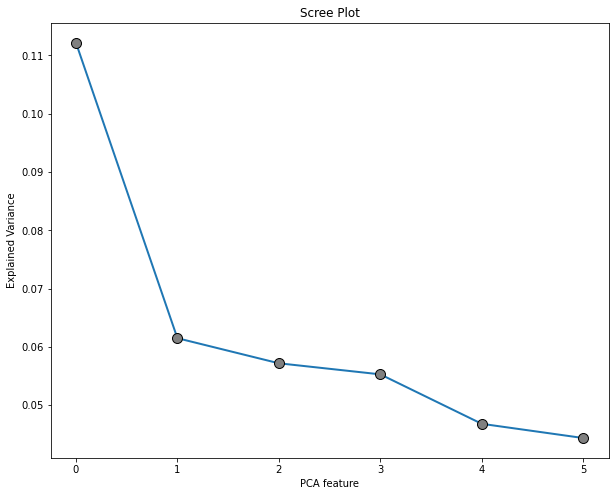

In [27]:
# INSTANTIATING a new model using the first three principal components
pca_6 = PCA(n_components = 6,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
beh_6 = pca_6.fit_transform(survey_beh_scaled)

# >>> Delete after for removing the noise in the code translation:

# calling the scree_plot function
scree_plot(pca_object = pca_6)

In [28]:
# Transposing PCA components - behavioral questions
factor_loadings_df_beh = pd.DataFrame(np.transpose(pca_1.components_.round(decimals = 2)))


# Naming rows as original features
factor_loadings_df_beh = factor_loadings_df_beh.set_index(survey_beh_scaled.columns)


# Saving to Excel accordingly
factor_loadings_df_beh.to_excel('beh_factor_loadings.xlsx')

In [29]:
beh_1st_component = factor_loadings_df_beh.iloc[:, 0]\
                    [abs(factor_loadings_df_beh.iloc[:, 0]) >= 0.23]

# Analyzing output of the PCA - behavioral questions
beh_1st_component = factor_loadings_df_beh.iloc[:, 0]\
                    [abs(factor_loadings_df_beh.iloc[:, 0]) >= 0.23]  # first component

beh_2nd_component = factor_loadings_df_beh.iloc[:, 1]\
                    [abs(factor_loadings_df_beh.iloc[:, 1]) >= 0.23]  # second component

beh_3rd_component = factor_loadings_df_beh.iloc[:, 2]\
                    [abs(factor_loadings_df_beh.iloc[:, 2]) >= 0.23]  # third component

beh_4th_component = factor_loadings_df_beh.iloc[:, 3]\
                    [abs(factor_loadings_df_beh.iloc[:, 3]) >= 0.23]  # forth component

beh_5th_component = factor_loadings_df_beh.iloc[:, 4]\
                    [abs(factor_loadings_df_beh.iloc[:, 4]) >= 0.23]  # fifth component

beh_6th_component = factor_loadings_df_beh.iloc[:, 5]\
                    [abs(factor_loadings_df_beh.iloc[:, 5]) >= 0.23]  # sixth component


# Displaying the result with significant correlation (>= 23%) between pc and questions
print(f"""
Behavioral Questions
---------------------------
> 1st Component        
Explained Variance = 11.2%             
{beh_1st_component.to_string()}

> 2nd Component
Explained Variance = 6.2%
{beh_2nd_component.to_string()}

> 3rd Component
Explained Variance = 5.7%
{beh_3rd_component.to_string()}

> 4th Component
Explained Variance = 5.5%
{beh_4th_component.to_string()}

> 5th Component
Explained Variance = 4.7%
{beh_5th_component.to_string()}

> 6th Component
Explained Variance = 4.5%
{beh_6th_component.to_string()}
""")   


Behavioral Questions
---------------------------
> 1st Component        
Explained Variance = 11.2%             
q25r1     0.28
q25r2     0.23
q25r3     0.24
q25r4     0.31
q25r7     0.26
q25r9     0.25
q25r10    0.23
q25r11    0.28

> 2nd Component
Explained Variance = 6.2%
q25r6    -0.34
q25r12   -0.25
q26r5    -0.27
q26r7     0.47
q26r11   -0.25
q26r15    0.26
q26r18    0.46

> 3rd Component
Explained Variance = 5.7%
q25r5     0.29
q25r12   -0.28
q26r3    -0.25
q26r4    -0.23
q26r8     0.42
q26r10    0.47
q26r12    0.35

> 4th Component
Explained Variance = 5.5%
q25r6    -0.35
q26r3     0.46
q26r9     0.27
q26r15    0.35
q26r17    0.27

> 5th Component
Explained Variance = 4.7%
q25r2    -0.28
q25r10    0.34
q25r11    0.34
q26r11    0.52
q26r12    0.33
q26r16   -0.27

> 6th Component
Explained Variance = 4.5%
q25r12   -0.27
q26r4     0.30
q26r6     0.56
q26r9    -0.25
q26r13    0.27
q26r16    0.28
q26r17   -0.31



In [30]:
# Transposing pca components (pc = 6)
beh_loadings = pd.DataFrame(np.transpose(pca_6.components_))


# Naming rows as original features
beh_loadings = beh_loadings.set_index(survey_beh_scaled.columns)


# Naming each principal component
beh_loadings.columns = ['Introvert',                  # Introvert / Preference to be alone
                        'Responsible Parents',        # Parents who control their spendings 
                        'Careful Buyer',              # Careful with purchases
                        'Spontaneous No Style',       # Irresponsible rich (maybe) person without good taste
                        'Capital App',                # Prefers to buy many apps, but no in-app purchases
                        'Busy Professional']          # Professional using phone for distraction

In [31]:
# Analyzing tech factor strengths per customer
tech_loadings_obs = pca_4.transform(survey_tech_scaled) # tech
beh_loadings_obs = pca_6.transform(survey_beh_scaled)   # behavior


# Converting to a DataFrame
tech_loadings_df = pd.DataFrame(tech_loadings_obs)      # tech
beh_loadings_df = pd.DataFrame(beh_loadings_obs)        # behavior

# Renaming columns
tech_loadings_df.columns = tech_loadings.columns        # tech
beh_loadings_df.columns = beh_loadings.columns          # behavior


# Concatenation of tech and behavioral questions
loadings = pd.concat([tech_loadings_df,
                      beh_loadings_df],
                      axis = 1)

# Checking the results
loadings.head(n = 2).round(decimals = 2)

In [33]:
# Applying the unsupervised_scaler function for dataset with pc and observations
loadings_scaled = unsupervised_scaler(df = loadings)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>Clustering</strong>


In [34]:
# Instantiating a k-Means object with six clusters
customers_k_pca = KMeans(n_clusters   = 6,
                        random_state = 219)


# Fitting the object to the data
customers_k_pca.fit(loadings_scaled)


# Converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# Checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts().to_string())

5    295
3    283
1    272
2    254
0    233
4    215


In [35]:
# Storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# Converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# Renaming principal components
centroids_pca_df.columns = ['No Fun', 'Old School', 'Concerned Tech Follower', 
                            'Ancient Messenger',        # tech components
                            
                            'Introvert', 'Responsible Parents', 'Careful Buyer',
                            'Spontaneous No Style', 'Capital App', 
                            'Busy Professional']        # behavioral components

# Displaying results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,No Fun,Old School,Concerned Tech Follower,Ancient Messenger,Introvert,Responsible Parents,Careful Buyer,Spontaneous No Style,Capital App,Busy Professional
0,-0.54,-0.58,1.43,0.01,0.63,0.05,-0.31,-0.18,-0.04,-0.28
1,0.80,-0.47,-0.10,-0.80,-0.39,0.74,0.86,-0.56,-0.30,-0.05
2,0.47,-0.45,-0.16,1.20,-0.96,-0.11,-0.07,0.51,-0.32,-0.06
3,0.33,1.25,-0.36,-0.47,0.50,-0.30,-0.59,0.41,-0.64,-0.63
4,-0.11,-0.39,-0.08,-0.20,0.22,-1.06,0.92,0.01,0.86,-0.02
5,-0.96,0.36,-0.50,0.30,0.05,0.44,-0.60,-0.18,0.56,0.94


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong> # Adding demographics</strong>

In [37]:
# Concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                          loadings],
                          axis = 1)


# Concatenation of demographic data and Q2 (what type of smartphone) with pca-clusters
final_pca_clust_df = pd.concat([survey.loc[:, survey_dict['demographic']],
                                survey.loc[:, ['q2r1', 'q2r2', 'q2r3', 'q2r4',
                                              'q2r5', 'q2r6', 'q2r7', 'q2r8',
                                              'q2r9', 'q2r10']],
                                clst_pca_df.round(decimals = 2)],
                                axis = 1)


# Renaming columns
final_pca_clust_df.columns = [ 'Age', 'Education', 'Marital Status', 
                              'Children_Non', 'Children_less6', 'Children_6-12',
                              'Children_13-17', 'Children_over18', 
                              'Race', 'Latino', 'Income', 'Gender', # demographic data
                              
                              'iPhone', 'iPod', 'Android', 'Blackberry',
                              'Nokia', 'Windows Phone', 'HP', 'Tablet',
                              'Other Smartphone', 'No Smartphone',  # Q2
                              
                              'Cluster',                            # cluster
                              
                              'No Fun', 'Old School', 'Concerned Tech Follower', 
                              'Ancient Messenger',                  # tech components
                            
                              'Introvert', 'Responsible Parents', 'Careful Buyer',
                              'Spontaneous No Style', 'Capital App', 
                              'Busy Professional']                  # behavioral components

In [38]:
# Renaming Age
age_names = {1 : 'Under 18 yrs',
             2 : '18-24 yrs',
             3 : '25-29 yrs',
             4 : '30-34 yrs',
             5 : '35-39 yrs',
             6 : '40-44 yrs',
             7 : '45-49 yrs',
             8 : '50-54 yrs',
             9 : '55-59 yrs',
             10: '60-64 yrs',
             11: 'Over 65 yrs'}

 # Replacing numbers with categorical data
final_pca_clust_df['Age'].replace(age_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Education
education_names = {1 : 'Some high school',
                   2 : 'High school graduate',
                   3 : 'Some college',
                   4 : 'College graduate',
                   5 : 'Some post-graduate studies',
                   6 : 'Post graduate degree'}

 # Replacing numbers with categorical data
final_pca_clust_df['Education'].replace(education_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Marital Status
marital_names = {1 : 'Married',
                 2 : 'Single',
                 3 : 'Single with a partner',
                 4 : 'Separated/Widowed/Divorced'}

 # Replacing numbers with categorical data
final_pca_clust_df['Marital Status'].replace(marital_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Race
race_names = {1 : 'White / Caucasian',
              2 : 'Black / African American',
              3 : 'Asian',
              4 : 'Native Hawaiian / Pacific Islander',
              5 : 'American Indian / Alaska Native',
              6 : 'Other Race'}

 # Replacing numbers with categorical data
final_pca_clust_df['Race'].replace(race_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Latino
latino_names = {1 : 'Yes',
              2 : 'No'}

 # Replacing numbers with categorical data
final_pca_clust_df['Latino'].replace(latino_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Income
income_names = {1 : 'Under 10,000',
                2 : '10,000-14,999',
                3 : '15,000-19,999',
                4 : '20,000-29,999',
                5 : '30,000-39,999',
                6 : '40,000-49,999',
                7 : '50,000-59,999',
                8 : '60,000-69,999',
                9 : '70,000-79,999',
                10: '80,000-89,999',
                11: '90,000-99,999',
                12: '100,000-124,999',
                13: '125,000-149,999',
                14: 'Over 150,000'}

 # Replacing numbers with categorical data
final_pca_clust_df['Income'].replace(income_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Gender
gender_names = {1 : 'Male',
                2 : 'Female'}

 # Replacing numbers with categorical data
final_pca_clust_df['Gender'].replace(gender_names, inplace = True)

#-----------------------------------------------------------------------------

# Renaming Children_Non 
children_non_names = {0 : 'No',
                      1 : 'Yes'}

# Renaming Children_less6 
children_less6_names = {0 : 'No',
                        1 : 'Yes'}

# Renaming Children_6-12 
children_6_12_names = {0 : 'No',
                       1 : 'Yes'}

# Renaming Children_13-17 
children_13_17_names = {0 : 'No',
                        1 : 'Yes'}

# Renaming Children_over18
children_over18_names = {0 : 'No',
                         1 : 'Yes'}

 # Replacing numbers with categorical data
final_pca_clust_df['Children_Non'].replace(children_non_names, inplace = True)
final_pca_clust_df['Children_less6'].replace(children_less6_names, inplace = True)
final_pca_clust_df['Children_6-12'].replace(children_6_12_names, inplace = True)
final_pca_clust_df['Children_13-17'].replace(children_13_17_names, inplace = True)
final_pca_clust_df['Children_over18'].replace(children_over18_names, inplace = True)

#-----------------------------------------------------------------------------
# Renaming clusters
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5',
                 5 : 'Cluster 6'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

#-----------------------------------------------------------------------------

# Adding a productivity step
data_df = final_pca_clust_df

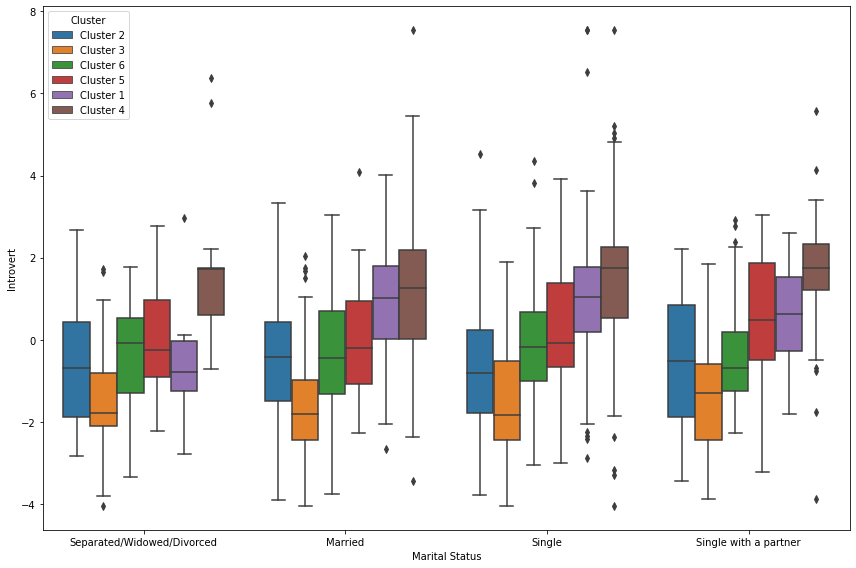

In [39]:
# Marital Status

# Introvert
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Marital Status',
            y = 'Introvert',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

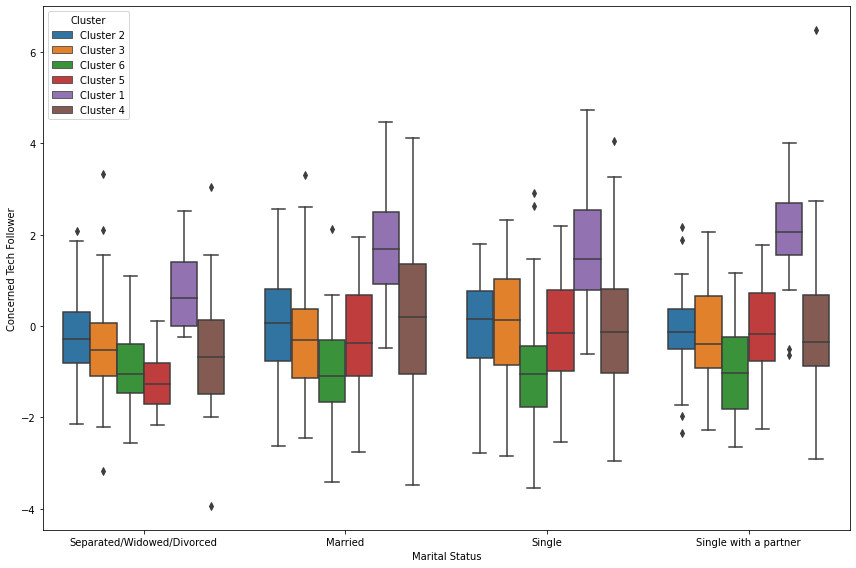

In [41]:
# Concerned Tech Follower
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Marital Status',
            y = 'Concerned Tech Follower',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

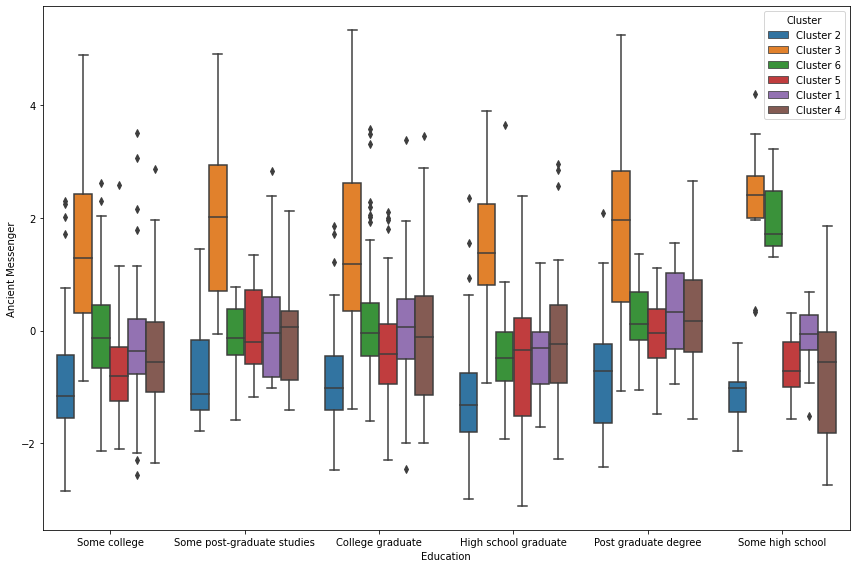

In [43]:
# Education

# Ancient Messenger
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Education',
            y = 'Ancient Messenger',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

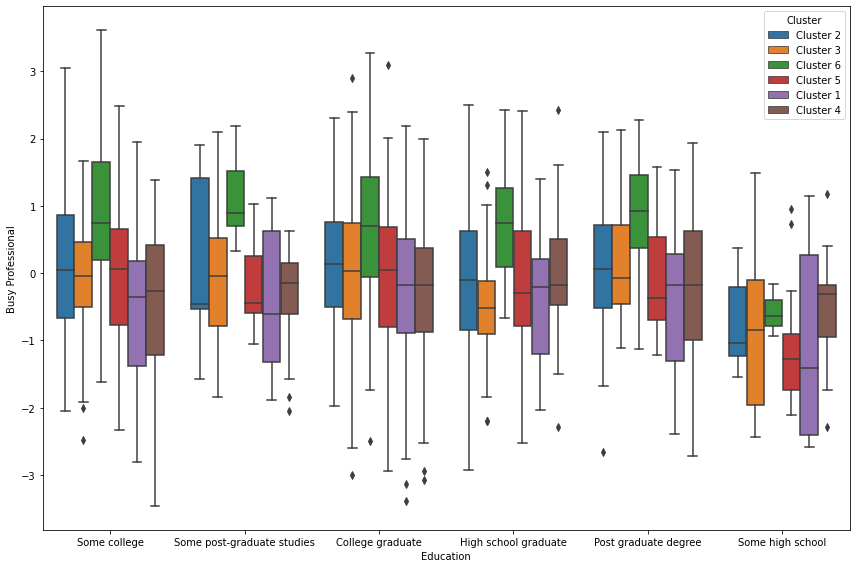

In [44]:
# Education

# Busy Professional
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Education',
            y = 'Busy Professional',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

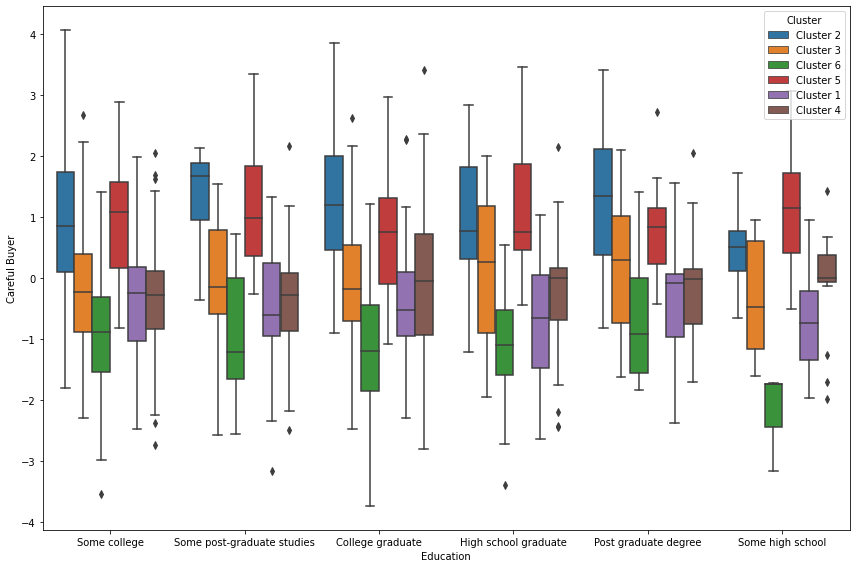

In [45]:
# Education

# Careful Buyer
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Education',
            y = 'Careful Buyer',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

Based on the results of correlating the identified groups with the principal components, we identified the most robust preferences of people:

Cluster 1. 15% of respondents. A group of people mainly follow technological development but are worried about its growing role in people's lives. In addition to this, they are mostly introverts. 

Cluster 2. 18% of respondents. A group of people who carefully monitor their purchases and plan time for shopping. They are specifically looking for discounts and promotions. Traits within this group do not vary with demographics.

Cluster 3. 16% of respondents. Very extroverted people looking for communication everywhere, both offline and online. At the same time, they do not use modern messengers.

Cluster 4. 18% of respondents. Prefer to spend a lot of their spare time watching TV shows and using slightly outdated platforms. In doing so, they also involve children in this pastime. In addition, they can also spend another part of their free time shopping.

Cluster 5. 14% of respondents. A group of people who prefer to buy expensive items that suit their style and are willing to take a long time to do so. Find discounts or promotions would affect their shopping patterns. For this cluster a sale can be seen as final so they are not likely to do further in-app-purchases.

Cluster 6. 19% of respondents. Quite busy people who use the phone as a distraction. They spend much free time there on entertainment, especially music and games. In doing so, they will focus on pretty new trends and will not miss the opportunity to show off their purchases to others. 